# Helmet Compliance Detection - SIMPLIFIED

**Focus:** Helmet on head = ✓ COMPLIANT | Helmet anywhere else = ✗ NON-COMPLIANT

**Author:** Zulfaqar  
**Project:** INF3001 Deep Learning - PPE Detection

## Step 1: Install Packages

In [2]:
!pip install ultralytics mediapipe opencv-python


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Step 2: Import and Initialize

In [ ]:
from backend.helmet_compliance_detector import HelmetComplianceDetector
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Initialize the detector
detector = HelmetComplianceDetector(
    ppe_model_path='../ppe-4080-v12/weights/best.pt',
    confidence_threshold=0.5
)

print("\n✓ Helmet detector ready!")

HELMET COMPLIANCE DETECTOR - SIMPLIFIED

[1/3] Loading YOLOv8n (pretrained) for person detection...
      ✓ Person detection ready!

[2/3] Loading YOUR PPE model from: ../ppe-4080-v12/weights/best.pt
      ✓ PPE model loaded!

[3/3] Initializing MediaPipe Pose...
      ✓ Pose estimation ready!

READY TO DETECT!
Helmet threshold: 120px from head


✓ Helmet detector ready!


## Step 3: Adjust Threshold (Optional)

**Default:** 120 pixels  
**Increase** if workers wearing helmets are marked non-compliant  
**Decrease** for stricter detection

In [5]:
# Check current threshold
print(f"Current threshold: {detector.HELMET_ON_HEAD_THRESHOLD}px")

# Adjust if needed (uncomment and modify)
# detector.HELMET_ON_HEAD_THRESHOLD = 150  # More lenient
# detector.HELMET_ON_HEAD_THRESHOLD = 80   # Stricter

print(f"Threshold set to: {detector.HELMET_ON_HEAD_THRESHOLD}px")

Current threshold: 120px
Threshold set to: 120px


## Step 4: Load and Process Image

In [17]:
# Load your image
image_path = '../dataset/train/helmet/477.jpg'  # Update this path 547 works

frame = cv2.imread(image_path)

if frame is None:
    print(f"❌ Error: Could not load image from {image_path}")
    print("Please update the path to a valid image file.")
else:
    print(f"✓ Image loaded: {frame.shape[1]}x{frame.shape[0]} pixels")

✓ Image loaded: 640x640 pixels


In [18]:
# Process the image
output_frame, results = detector.process_frame(frame, visualize=True)

# Print results
print("\n" + "="*70)
print("HELMET COMPLIANCE RESULTS")
print("="*70)
print(f"Total People: {results['total_people']}")
print(f"Compliant (helmet on head): {results['compliant']}")
print(f"Non-Compliant: {results['non_compliant']}")
print(f"Compliance Rate: {results['compliance_rate']*100:.1f}%")
print("="*70)

# Detailed breakdown
print("\nDetailed Analysis:")
for i, analysis in enumerate(results['analyses'], 1):
    status_icon = "✓" if analysis['compliant'] else "✗"
    print(f"  Person {i}: {status_icon} {analysis['status']}")
    print(f"           {analysis['reason']}")


[Detection] Found 1 people, 1 helmets

HELMET COMPLIANCE RESULTS
Total People: 1
Compliant (helmet on head): 1
Non-Compliant: 0
Compliance Rate: 100.0%

Detailed Analysis:
  Person 1: ✓ WEARING
           Helmet on head (35px from head)


## Step 5: Display Result

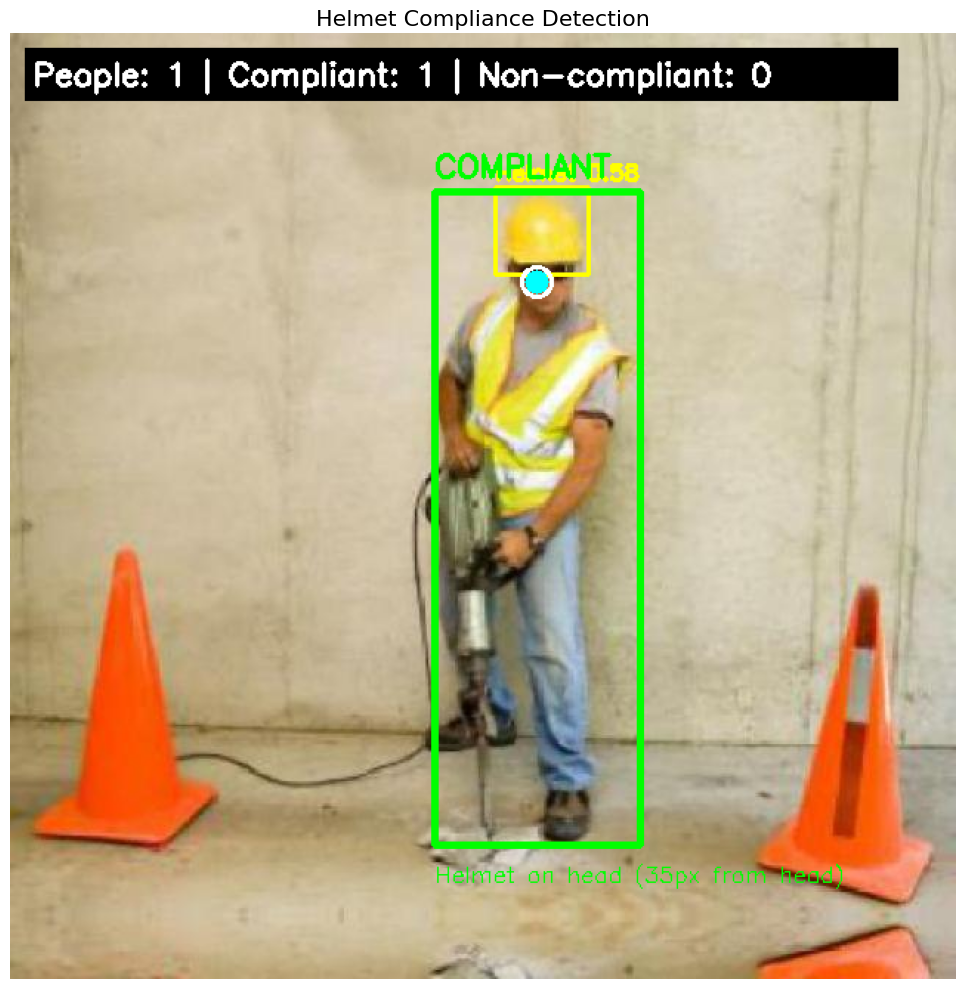

In [19]:
# Display the annotated image
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
plt.title('Helmet Compliance Detection', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

## Step 6: Debug - Show Distances (Optional)

In [13]:
# Show detailed distance information
print("\n" + "="*70)
print("DISTANCE DEBUG INFO")
print("="*70)
print(f"Current threshold: {detector.HELMET_ON_HEAD_THRESHOLD}px\n")

for i, analysis in enumerate(results['analyses'], 1):
    print(f"Person {i}:")
    
    if not analysis['head_detected']:
        print(f"  ⚠ Could not detect head position\n")
        continue
    
    if analysis['distance_to_head'] is not None:
        dist = analysis['distance_to_head']
        threshold = detector.HELMET_ON_HEAD_THRESHOLD
        
        print(f"  Helmet distance from head: {dist:.1f}px")
        print(f"  Threshold: {threshold}px")
        
        if dist < threshold:
            print(f"  ✓ PASS - Helmet on head ({dist:.1f} < {threshold})")
        else:
            print(f"  ✗ FAIL - Helmet too far ({dist:.1f} > {threshold})")
            print(f"  💡 Suggestion: Set threshold to {int(dist + 30)}px")
    else:
        print(f"  ⚠ No helmet detected")
    
    print()


DISTANCE DEBUG INFO
Current threshold: 120px

Person 1:
  Helmet distance from head: 31.4px
  Threshold: 120px
  ✓ PASS - Helmet on head (31.4 < 120)

Person 2:
  Helmet distance from head: 24.0px
  Threshold: 120px
  ✓ PASS - Helmet on head (24.0 < 120)



## Understanding the Output

### Color Coding:
- 🟢 **Green box** = COMPLIANT (helmet on head)
- 🔴 **Red box** = NON-COMPLIANT (no helmet or helmet not on head)
- 🟡 **Yellow box** = Detected helmet
- 🔵 **Cyan dot** = Head position (nose keypoint)

### Status Messages:
- **WEARING** - Helmet is on head ✓
- **NOT_WEARING** - Helmet detected but not on head ✗
- **NO_HELMET** - No helmet detected ✗
- **NO_POSE** - Could not detect head position ✗

### How It Works:
1. Detects people (YOLOv8n)
2. Detects helmets (your PPE model)
3. Finds head position (MediaPipe pose)
4. Measures distance: helmet center → head position
5. If distance < threshold → COMPLIANT ✓
6. If distance > threshold → NON-COMPLIANT ✗

## Summary

This simplified detector focuses **only on helmet compliance**:

✓ **COMPLIANT** = Helmet on head (within threshold distance)  
✗ **NON-COMPLIANT** = Helmet anywhere else or missing

**Simple. Clear. Focused.** 🎯